In [34]:
#r2_score=0.7978
#by separating continues(standard scaling) and catagorical(label_encoding)
#then spliting and hence apply model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skn
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data=data.drop(['region'],axis=1)

In [8]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [9]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [11]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [12]:
x1=x.drop(['sex','children','smoker'],axis=1)
x2=x.drop(['age','bmi'],axis=1)
x1.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x1)

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
x1=pd.DataFrame(x1)
x1=x1.rename(columns={0:'age',1:'bmi'})
x1.head()

,age,bmi
0,-1.438764,-0.453320
1,-1.509965,0.509621
2,-0.797954,0.383307
3,-0.441948,-1.305531
4,-0.513149,-0.292556


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [16]:
x2=x2.apply(label_encoder.fit_transform)
x2.head()

,sex,children,smoker
0,0,0,1
1,1,1,0
2,1,3,0
3,1,0,0
4,1,0,0


In [17]:
xx=pd.concat([x1,x2],axis=1)
xx.head()

,age,bmi,sex,children,smoker
0,-1.438764,-0.453320,0,0,1
1,-1.509965,0.509621,1,1,0
2,-0.797954,0.383307,1,3,0
3,-0.441948,-1.305531,1,0,0
4,-0.513149,-0.292556,1,0,0


In [18]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(xx,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [20]:
ypred

array([[ 1.14487064e+04],
       [ 9.93122532e+03],
       [ 3.77727178e+04],
       [ 1.59357390e+04],
       [ 6.88997647e+03],
       [ 3.59863726e+03],
       [ 1.12708165e+03],
       [ 1.40623170e+04],
       [ 8.76765597e+03],
       [ 7.23372702e+03],
       [ 4.15287454e+03],
       [ 1.01167075e+04],
       [ 9.08138366e+03],
       [ 4.30837572e+03],
       [ 2.76879360e+04],
       [ 1.11696620e+04],
       [ 1.11718384e+04],
       [ 5.55433485e+03],
       [ 8.00873212e+03],
       [ 2.66039850e+04],
       [ 3.34802407e+04],
       [ 1.40836906e+04],
       [ 1.12578208e+04],
       [ 3.25955729e+04],
       [ 4.51420381e+03],
       [ 8.63780775e+03],
       [ 7.82347089e+02],
       [ 1.01722949e+04],
       [ 4.25706263e+03],
       [ 1.01894544e+04],
       [ 8.79010666e+03],
       [ 4.03307822e+04],
       [ 1.58764118e+04],
       [ 1.40596765e+04],
       [ 2.43874022e+04],
       [ 4.70442876e+03],
       [ 1.29057280e+04],
       [ 3.09071751e+04],
       [ 3.3

In [21]:
ypred1=model.predict([[-1.5099,0.5096,1,1,0]])
ypred1

array([[3925.39719613]])

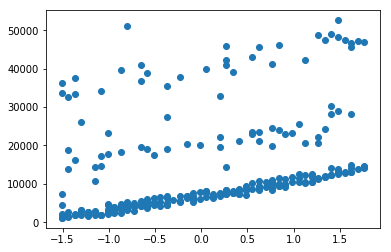

In [22]:
plt.scatter(xtest['age'],ytest)


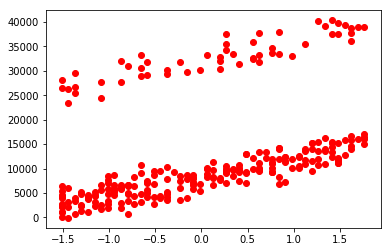

In [23]:
plt.scatter(xtest['age'],ypred,c='red')

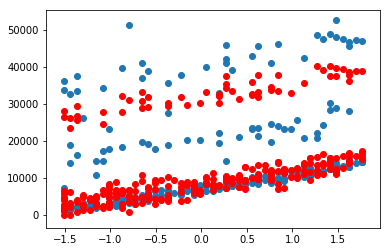

In [24]:
plt.scatter(xtest['age'],ytest)

plt.scatter(xtest['age'],ypred,c='red')

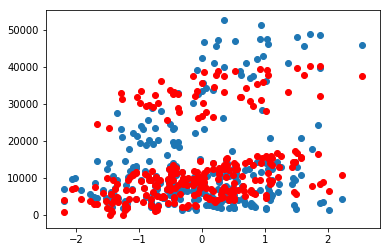

In [25]:
plt.scatter(xtest['bmi'],ytest)

plt.scatter(xtest['bmi'],ypred,c='red')

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7978644236809904

In [31]:
ytest.head()

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250


In [33]:
ypred

array([[ 1.14487064e+04],
       [ 9.93122532e+03],
       [ 3.77727178e+04],
       [ 1.59357390e+04],
       [ 6.88997647e+03],
       [ 3.59863726e+03],
       [ 1.12708165e+03],
       [ 1.40623170e+04],
       [ 8.76765597e+03],
       [ 7.23372702e+03],
       [ 4.15287454e+03],
       [ 1.01167075e+04],
       [ 9.08138366e+03],
       [ 4.30837572e+03],
       [ 2.76879360e+04],
       [ 1.11696620e+04],
       [ 1.11718384e+04],
       [ 5.55433485e+03],
       [ 8.00873212e+03],
       [ 2.66039850e+04],
       [ 3.34802407e+04],
       [ 1.40836906e+04],
       [ 1.12578208e+04],
       [ 3.25955729e+04],
       [ 4.51420381e+03],
       [ 8.63780775e+03],
       [ 7.82347089e+02],
       [ 1.01722949e+04],
       [ 4.25706263e+03],
       [ 1.01894544e+04],
       [ 8.79010666e+03],
       [ 4.03307822e+04],
       [ 1.58764118e+04],
       [ 1.40596765e+04],
       [ 2.43874022e+04],
       [ 4.70442876e+03],
       [ 1.29057280e+04],
       [ 3.09071751e+04],
       [ 3.3